In [3]:
pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt

stock = 'AAPL'
start = dt.datetime(2020, 1, 1)
data = web.get_data_yahoo(stock, start)

#10 and 20 day moving averages
data['10_MA'] = data['Adj Close'].rolling(10).mean()
data['20_MA'] = data['Adj Close'].rolling(20).mean()
data.dropna(inplace = True)

In [7]:
#MA Trade Calls
Trade_Buy = []
Trade_Sell = []

for i in range(len(data) - 1):
    if ((data['10_MA'].values[i] < data['20_MA'].values[i]) & (data['10_MA'].values[i+1] > data['20_MA'].values[i+1])):
        Trade_Buy.append(i)
    elif ((data['10_MA'].values[i] > data['20_MA'].values[i]) & (data['10_MA'].values[i+1] < data['20_MA'].values[i+1])):
        Trade_Sell.append(i)

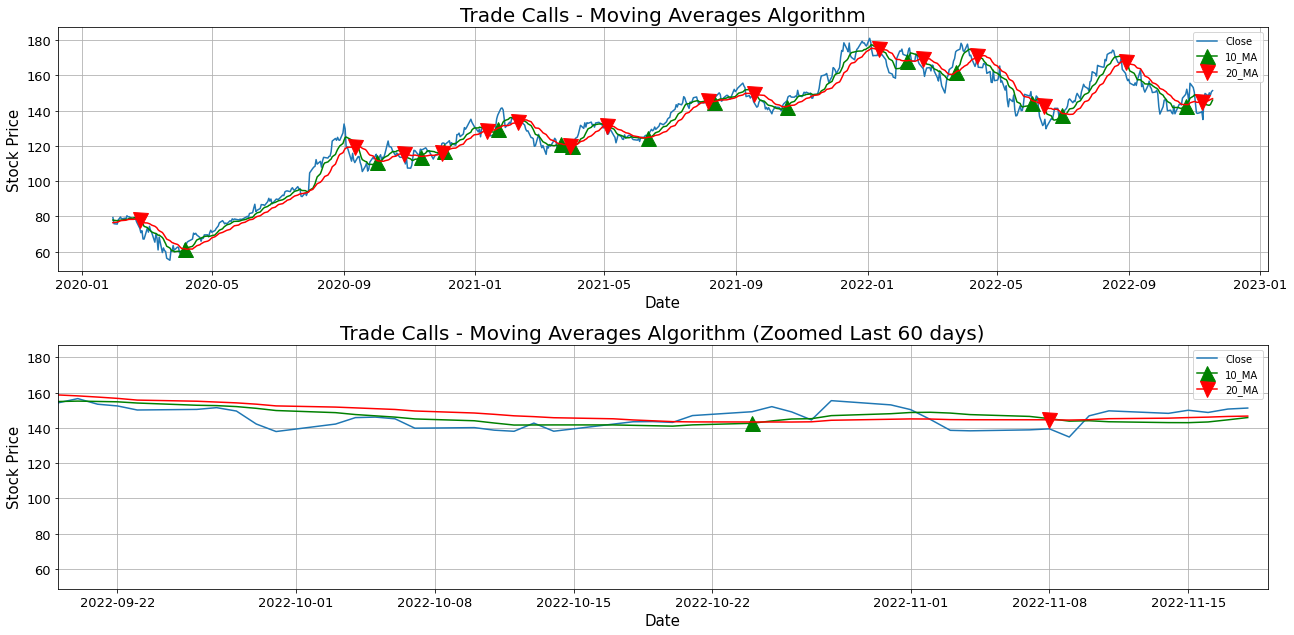

In [24]:
from datetime import timedelta
fig, ax = plt.subplots(2, 1, figsize = (20, 10))

ax[0].plot(data.index, data['Adj Close'])
ax[0].plot(data.index, data['10_MA'],'-^', markevery=Trade_Buy, ms=15, color = 'g')
ax[0].plot(data.index, data['20_MA'],'-v', markevery=Trade_Sell, ms=15, color = 'r')
ax[0].set_xlabel('Date', fontsize = 15)
ax[0].set_ylabel('Stock Price', fontsize = 15)
ax[0].tick_params(axis = 'x', labelsize = 13)
ax[0].tick_params(axis = 'y', labelsize = 13)
ax[0].set_title('Trade Calls - Moving Averages Algorithm', fontdict = {'size': 20})
ax[0].legend(['Close','10_MA','20_MA'])
ax[0].grid()

ax[1].plot(data.index, data['Adj Close'])
ax[1].plot(data.index, data['10_MA'],'-^', markevery=Trade_Buy, ms=15, color = 'g')
ax[1].plot(data.index, data['20_MA'],'-v', markevery=Trade_Sell, ms=15, color = 'r')
ax[1].set_xlabel('Date', fontsize = 15)
ax[1].set_ylabel('Stock Price', fontsize = 15)
ax[1].tick_params(axis = 'x', labelsize = 13)
ax[1].tick_params(axis = 'y', labelsize = 13)
ax[1].set_title('Trade Calls - Moving Averages Algorithm (Zoomed Last 60 days)', fontdict = {'size': 20})
ax[1].legend(['Close','10_MA','20_MA'])
ax[1].set_xlim(data.index[-1] - timedelta(60), data.index[-1] + timedelta(1))
#ax[1].set_ylim(200, 550)
ax[1].grid()

plt.subplots_adjust(top = 0.92, left = 0.09, right = 0.93, bottom = 0.14, hspace = 0.3)
plt.show()

In [12]:
import requests
import pandas as pd
url = 'https://newsapi.org/v2/everything?' #NewsAPI Url

parameters = {'q' : stock, #Stock para el Query
              'sortby' : 'popularity', #Los articulos de paginas mas populares
              'pageSize' : 100, #Lo maximo que se permite para Devs
              'language' : 'en', #Idioma
              'apiKey': '1be93d3e6c3c439598c4dadac0939c2f' } #Key Personal

req = requests.get(url, params = parameters)
req_data = pd.DataFrame(req.json())
req_data

,status,totalResults,articles
0,ok,1212,"{'source': {'id': 'cnn', 'name': 'CNN'}, 'auth..."
1,ok,1212,"{'source': {'id': None, 'name': 'Yahoo Enterta..."
2,ok,1212,"{'source': {'id': None, 'name': 'Investorplace..."
3,ok,1212,"{'source': {'id': None, 'name': 'ReadWrite'}, ..."
4,ok,1212,"{'source': {'id': None, 'name': 'Jacobin.com'}..."
...,...,...,...
95,ok,1212,"{'source': {'id': None, 'name': 'Motley Fool'}..."
96,ok,1212,"{'source': {'id': None, 'name': 'Motley Fool'}..."
97,ok,1212,"{'source': {'id': None, 'name': 'Motley Fool'}..."
98,ok,1212,"{'source': {'id': None, 'name': 'Motley Fool'}..."


In [13]:
news_df = pd.concat([req_data['articles'].apply(pd.Series)], axis = 1)
final_news = news_df.loc[:, ['publishedAt', 'title']]
final_news['publishedAt'] = pd.to_datetime(final_news['publishedAt'])
final_news.sort_values(by = 'publishedAt', inplace = True)
final_news 

,publishedAt,title
21,2022-10-19 16:50:52+00:00,Morgan Stanley pares AAPL target slightly to $177
46,2022-10-20 09:35:00+00:00,My Top 2 Dividend Stocks to Buy Now
24,2022-10-20 13:40:21+00:00,Consumer demand for smartphones will continue ...
10,2022-10-20 13:42:40+00:00,Tech earnings may show us just how bad things ...
17,2022-10-21 09:01:00+00:00,Kelley Blue Book: The all-new 2023 Kia Sportag...
...,...,...
45,2022-11-18 12:00:00+00:00,3 Must-Own Stocks for 2023 (and Beyond)
51,2022-11-18 12:11:00+00:00,How Warren Buffett Made a Bet on Apple Without...
49,2022-11-18 14:00:00+00:00,3 Stocks You Can Confidently Buy After a Marke...
84,2022-11-18 15:03:18+00:00,Should You Buy Netflix Hand Over Fist for 2023?


In [14]:
from pandas.tseries.offsets import BDay

#News API works with a timezone UTC(+000) so 1:30 pm is 9:30 am in NYC and 8 pm is 4 pm.
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

final_news['Trading_Time'] = final_news['publishedAt'].apply(get_trade_open)
final_news.dropna(inplace = True)
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['Trading_Time']).dt.date)
final_news.head()

,publishedAt,title,Trading_Time,Date
46,2022-10-20 09:35:00+00:00,My Top 2 Dividend Stocks to Buy Now,2022-10-20 13:30:00+00:00,2022-10-20
17,2022-10-21 09:01:00+00:00,Kelley Blue Book: The all-new 2023 Kia Sportag...,2022-10-21 13:30:00+00:00,2022-10-21
85,2022-10-21 10:25:00+00:00,Want to Get Richer? 3 Top Stocks to Buy Now an...,2022-10-21 13:30:00+00:00,2022-10-21
11,2022-10-21 20:00:00+00:00,The Wall Street Journal: Apple’s design chief ...,2022-10-24 13:30:00+00:00,2022-10-24
34,2022-10-22 10:06:00+00:00,This Dow Jones Stock Is a No-Brainer for Divid...,2022-10-24 13:30:00+00:00,2022-10-24


In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/davidpitoun/nltk_data...


True

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

scores = pd.DataFrame(final_news['title'].apply(vader.polarity_scores).tolist())
final_news['compound'] = scores['compound'].values.tolist()
final_news = final_news[final_news['compound'] != 0].reset_index(drop = True)
final_news.head()

,publishedAt,title,Trading_Time,Date,compound
0,2022-10-20 09:35:00+00:00,My Top 2 Dividend Stocks to Buy Now,2022-10-20 13:30:00+00:00,2022-10-20,0.2023
1,2022-10-21 09:01:00+00:00,Kelley Blue Book: The all-new 2023 Kia Sportag...,2022-10-21 13:30:00+00:00,2022-10-21,-0.6369
2,2022-10-21 10:25:00+00:00,Want to Get Richer? 3 Top Stocks to Buy Now an...,2022-10-21 13:30:00+00:00,2022-10-21,0.6705
3,2022-10-22 10:06:00+00:00,This Dow Jones Stock Is a No-Brainer for Divid...,2022-10-24 13:30:00+00:00,2022-10-24,0.3818
4,2022-10-23 14:04:00+00:00,Snap's Stock Crashes as Apple's Policy Changes...,2022-10-24 13:30:00+00:00,2022-10-24,-0.1280


In [21]:
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_score = []
min_score = []

for key in grouped_dates.groups.keys():
    data_group = grouped_dates.get_group(key)
    if data_group["compound"].max() > 0:
        max_score.append(data_group["compound"].max())
    elif data_group["compound"].max() < 0:
        max_score.append(0)
    
    if data_group["compound"].min() < 0:
        min_score.append(data_group["compound"].min())
    elif data_group["compound"].min() > 0:
        min_score.append(0)
        
extreme_score = pd.DataFrame({'Date':keys_dates, 'Min_Score':min_score, 'Max_Score':max_score})
extreme_score['Final_Score'] = extreme_score[['Min_Score','Max_Score']].sum(axis = 1)
extreme_score.head()

,Date,Min_Score,Max_Score,Final_Score
0,2022-10-20,0.0000,0.2023,0.2023
1,2022-10-21,-0.6369,0.6705,0.0336
2,2022-10-24,-0.1280,0.3818,0.2538
3,2022-10-25,0.0000,0.6486,0.6486
4,2022-10-26,-0.4404,0.6115,0.1711


In [22]:
Buy_Option = []
Sell_Option = []

for i in range(len(extreme_score)):
    if extreme_score['Final_Score'].values[i] > 0.3: #Optional Threshold
        Buy_Option.append(extreme_score['Date'].iloc[i].date())
    elif extreme_score['Final_Score'].values[i] < 0.3: #Optional Threshold
        Sell_Option.append(extreme_score['Date'].iloc[i].date())

vader_buy = []
for i in range(len(data)):
    if data.index[i].date() in Buy_Option:
        vader_buy.append(i)
        
vader_sell = []
for i in range(len(data)):
    if data.index[i].date() in Sell_Option:
        vader_sell.append(i)

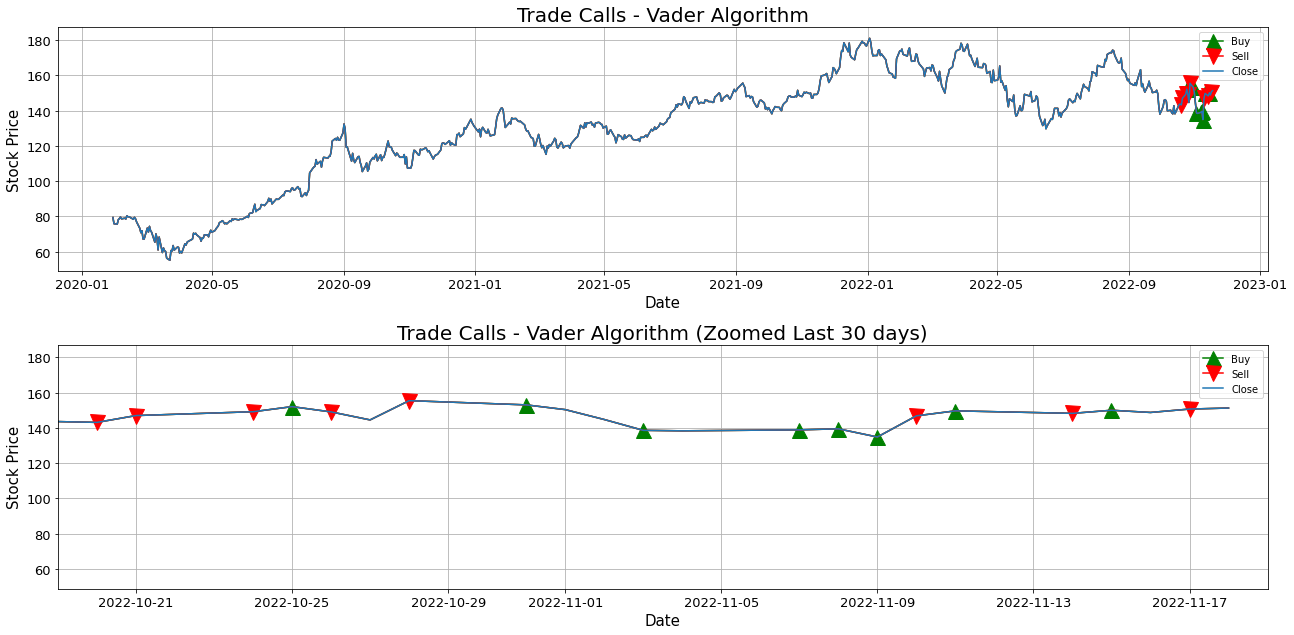

In [25]:
fig, ax = plt.subplots(2, 1, figsize = (20, 10))

ax[0].plot(data.index, data['Adj Close'],'-^', markevery=vader_buy, ms=15, color = 'g')
ax[0].plot(data.index, data['Adj Close'],'-v', markevery=vader_sell, ms=15, color = 'r')
ax[0].plot(data.index, data['Adj Close'])
ax[0].set_xlabel('Date', fontsize = 15)
ax[0].set_ylabel('Stock Price', fontsize = 15)
ax[0].tick_params(axis = 'x', labelsize = 13)
ax[0].tick_params(axis = 'y', labelsize = 13)
ax[0].set_title('Trade Calls - Vader Algorithm', fontdict = {'size': 20})
ax[0].legend(['Buy','Sell','Close'])
ax[0].grid()

ax[1].plot(data.index, data['Adj Close'],'-^', markevery=vader_buy, ms=15, color = 'g')
ax[1].plot(data.index, data['Adj Close'],'-v', markevery=vader_sell, ms=15, color = 'r')
ax[1].plot(data.index, data['Adj Close'])
ax[1].set_xlabel('Date', fontsize = 15)
ax[1].set_ylabel('Stock Price', fontsize = 15)
ax[1].tick_params(axis = 'x', labelsize = 13)
ax[1].tick_params(axis = 'y', labelsize = 13)
ax[1].set_title('Trade Calls - Vader Algorithm (Zoomed Last 30 days)', fontdict = {'size': 20})
ax[1].legend(['Buy','Sell','Close'])
ax[1].set_xlim(data.index[-1] - timedelta(30), data.index[-1] + timedelta(1))
#ax[1].set_ylim(200, 550)
ax[1].grid()

plt.subplots_adjust(top = 0.92, left = 0.09, right = 0.93, bottom = 0.14, hspace = 0.3)
plt.show()

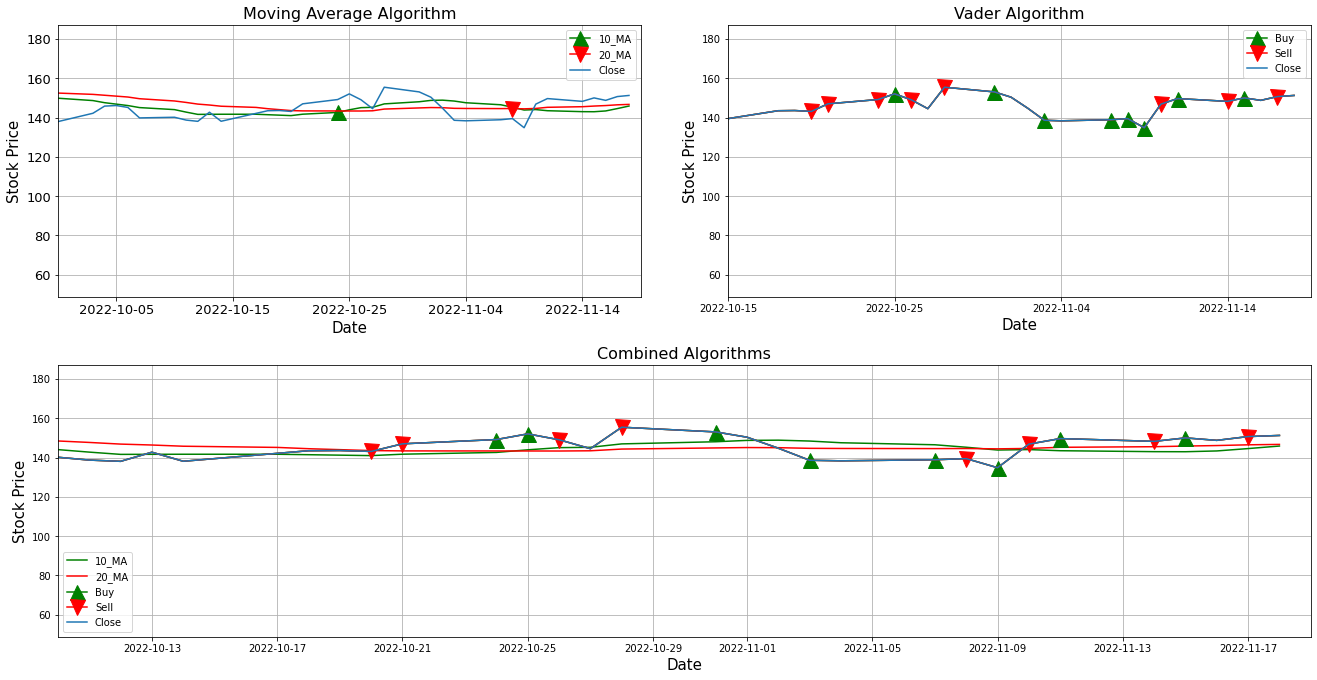

In [27]:
import matplotlib.ticker as ticker

plt.figure(figsize = (20, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan = 1, colspan = 1)
ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan = 1, colspan = 1)
ax3 = plt.subplot2grid((2, 2), (1, 0), rowspan = 1, colspan = 2)

ax1.plot(data.index, data['10_MA'],'-^', markevery=Trade_Buy, ms=15, color='green')
ax1.plot(data.index, data['20_MA'],'-v', markevery=Trade_Sell, ms=15, color='red')
ax1.plot(data.index, data['Adj Close'])
ax1.set_xlabel('Date',fontsize = 15)
ax1.set_ylabel('Stock Price', fontsize = 15)
ax1.tick_params(axis = 'x', labelsize = 13)
ax1.tick_params(axis = 'y', labelsize = 13)
ax1.set_title('Moving Average Algorithm', fontsize =  16)
ax1.set_xlim(final_news.Date[0] - timedelta(20), data.index[-1] + timedelta(1))
#ax1.set_ylim(200, 550)
ax1.legend(['10_MA','20_MA','Close'])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.grid()

ax2.plot(data.index, data['Adj Close'],'-^', markevery=vader_buy, ms=15, color='green')
ax2.plot(data.index, data['Adj Close'],'-v', markevery=vader_sell, ms=15, color='red')
ax2.plot(data.index, data['Adj Close'])
ax2.set_xlabel('Date',fontsize = 15)
ax2.set_ylabel('Stock Price', fontsize = 15)
ax2.set_title('Vader Algorithm', fontsize = 16)
ax2.legend(['Buy','Sell','Close'])
ax2.set_xlim(final_news.Date[0] - timedelta(5), data.index[-1] + timedelta(1))
#ax2.set_ylim(200, 550)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid()

#Combined
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

ax3.plot(data.index, data['10_MA'], color='green')
ax3.plot(data.index, data['20_MA'], color='red')
ax3.plot(data.index, data['Adj Close'],'-^', markevery=final_buy, ms=15, color='green')
ax3.plot(data.index, data['Adj Close'],'-v', markevery=final_sell, ms=15, color='red')
ax3.plot(data.index, data['Adj Close'])
ax3.set_xlabel('Date',fontsize = 15)
ax3.set_ylabel('Stock Price', fontsize = 15)
ax3.set_title('Combined Algorithms', fontsize = 16)
ax3.legend(['10_MA','20_MA','Buy','Sell','Close'])
#ax3.set_ylim(200, 550)
ax3.set_xlim(final_news.Date[0] - timedelta(10), data.index[-1] + timedelta(1))
ax3.grid()

plt.subplots_adjust(top = 0.94, bottom = 0.09, right = 0.94, left = 0.07, hspace = 0.25, wspace = 0.15)
plt.show()